# **Risk Analysis**

Constructing a portfolio and
Calculating 15 portfolio risk metrics

## Portfolio Construction

In [3]:
import pandas as pd

#### Extracting data | **'df' is the DataFrame w/ stock values**


In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [6]:
import yfinance as yf

**Enter dates range:**

In [8]:
# Define the start and end dates (yyyy-mm-dd)
start_date = pd.to_datetime("2022-01-01")
end_date = pd.to_datetime("2024-11-06")

# Calculate the difference in months
months_diff = (end_date.year - start_date.year) * 12 + end_date.month - start_date.month

print(months_diff)

34


**Enter tickers:**

In [10]:
# List of tickers for NSE stocks (append '.NS' to each NSE ticker)
tickers = ["HDFCBANK.NS", "ONGC.NS", "ICICIBANK.NS", "APOLLOHOSP.NS", "COLPAL.NS", "POWERGRID.NS", "TATAPOWER.NS", "KPITTECH.NS", "DLF.NS", "NMDC.NS"]  # Add more tickers as needed

# Download historical data for 1 or 2 years
data = yf.download(tickers, start=start_date, end=end_date)

# Extract only the closing prices
closing_prices = data['Close']

# Display the combined DataFrame
print(closing_prices.head())

# Optionally, save to a CSV file if you want
closing_prices.to_csv("nse_closing_prices.csv")

[*********************100%***********************]  10 of 10 completed

Ticker                     APOLLOHOSP.NS    COLPAL.NS      DLF.NS  \
Date                                                                
2022-01-03 00:00:00+00:00    4990.500000  1463.800049  394.750000   
2022-01-04 00:00:00+00:00    4964.600098  1464.800049  394.450012   
2022-01-05 00:00:00+00:00    4973.250000  1466.150024  402.049988   
2022-01-06 00:00:00+00:00    4964.450195  1456.900024  398.950012   
2022-01-07 00:00:00+00:00    5021.850098  1469.900024  400.600006   

Ticker                     HDFCBANK.NS  ICICIBANK.NS  KPITTECH.NS     NMDC.NS  \
Date                                                                            
2022-01-03 00:00:00+00:00  1519.650024    764.700012   608.150024  103.997322   
2022-01-04 00:00:00+00:00  1528.550049    772.849976   608.150024  104.381645   
2022-01-05 00:00:00+00:00  1564.849976    788.049988   594.200012  106.533844   
2022-01-06 00:00:00+00:00  1539.750000    785.049988   630.450012  106.572273   
2022-01-07 00:00:00+00:00  155

In [11]:
df = pd.read_csv(r"nse_closing_prices.csv")
df.head()

,Date,APOLLOHOSP.NS,COLPAL.NS,DLF.NS,HDFCBANK.NS,ICICIBANK.NS,KPITTECH.NS,NMDC.NS,ONGC.NS,POWERGRID.NS,TATAPOWER.NS
0,2022-01-03 00:00:00+00:00,4990.500000,1463.800049,394.750000,1519.650024,764.700012,608.150024,103.997322,143.050003,153.750000,223.399994
1,2022-01-04 00:00:00+00:00,4964.600098,1464.800049,394.450012,1528.550049,772.849976,608.150024,104.381645,147.800003,157.949997,226.300003
2,2022-01-05 00:00:00+00:00,4973.250000,1466.150024,402.049988,1564.849976,788.049988,594.200012,106.533844,150.350006,156.487503,223.500000
3,2022-01-06 00:00:00+00:00,4964.450195,1456.900024,398.950012,1539.750000,785.049988,630.450012,106.572273,150.800003,154.462494,228.449997
4,2022-01-07 00:00:00+00:00,5021.850098,1469.900024,400.600006,1550.550049,793.250000,711.250000,106.572273,157.050003,153.899994,229.800003


In [12]:
df.set_index('Date', inplace =True)

In [13]:
df.tail()

,APOLLOHOSP.NS,COLPAL.NS,DLF.NS,HDFCBANK.NS,ICICIBANK.NS,KPITTECH.NS,NMDC.NS,ONGC.NS,POWERGRID.NS,TATAPOWER.NS
Date,,,,,,,,,,
2024-10-30 00:00:00+00:00,6982.500000,3091.149902,826.400024,1734.599976,1312.150024,1385.300049,224.259995,261.649994,318.450012,427.000000
2024-10-31 00:00:00+00:00,7022.700195,3062.500000,819.849976,1735.699951,1292.250000,1393.250000,221.869995,266.149994,320.799988,440.049988
2024-11-01 00:00:00+00:00,7031.950195,3066.000000,823.750000,1737.300049,1291.800049,1424.250000,222.839996,271.750000,322.049988,445.450012
2024-11-04 00:00:00+00:00,6958.399902,2984.600098,789.900024,1714.099976,1277.199951,1403.599976,226.500000,265.299988,315.450012,429.049988
2024-11-05 00:00:00+00:00,6966.299805,2981.649902,799.049988,1757.849976,1296.699951,1390.000000,234.729996,267.399994,316.600006,434.100006


In [14]:
df.shape

(702, 10)

In [15]:
# Save the DataFrame to an Excel file
df.to_excel('stocks.xlsx', index=True)

**'df' is the DataFrame w/ stock values**

#### Calculating daily returns | **'returns' is the DataFrame w/ stock returns**

In [18]:
import numpy as np

In [19]:
returns = df.pct_change()

In [20]:
returns.dropna(inplace = True)

In [21]:
returns.head()

,APOLLOHOSP.NS,COLPAL.NS,DLF.NS,HDFCBANK.NS,ICICIBANK.NS,KPITTECH.NS,NMDC.NS,ONGC.NS,POWERGRID.NS,TATAPOWER.NS
Date,,,,,,,,,,
2022-01-04 00:00:00+00:00,-0.005190,0.000683,-0.000760,0.005857,0.010658,0.000000,0.003696,0.033205,0.027317,0.012981
2022-01-05 00:00:00+00:00,0.001742,0.000922,0.019267,0.023748,0.019667,-0.022938,0.020619,0.017253,-0.009259,-0.012373
2022-01-06 00:00:00+00:00,-0.001769,-0.006309,-0.007710,-0.016040,-0.003807,0.061006,0.000361,0.002993,-0.012940,0.022148
2022-01-07 00:00:00+00:00,0.011562,0.008923,0.004136,0.007014,0.010445,0.128162,0.000000,0.041446,-0.003642,0.005909
2022-01-10 00:00:00+00:00,0.008642,-0.003198,0.018347,0.005546,0.022061,0.048225,0.009376,0.008278,-0.005848,0.008486


#### Constructing a Portfolio of equal weights in terms of returns | **stored in returns['Portfolio']**
storing Portfolio returns in "Portfolio" column

In [23]:
#weights = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
# Count the total number of stocks
num_stocks = len(df.columns)
num_stocks


# Create an array of equal weights
equal_weights = np.repeat(1/num_stocks, num_stocks)
equal_weights

weights = equal_weights
weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [24]:
# Create portfolio returns column
returns['Portfolio']= returns.dot(weights)

In [25]:
returns.head()

,APOLLOHOSP.NS,COLPAL.NS,DLF.NS,HDFCBANK.NS,ICICIBANK.NS,KPITTECH.NS,NMDC.NS,ONGC.NS,POWERGRID.NS,TATAPOWER.NS,Portfolio
Date,,,,,,,,,,,
2022-01-04 00:00:00+00:00,-0.005190,0.000683,-0.000760,0.005857,0.010658,0.000000,0.003696,0.033205,0.027317,0.012981,0.008845
2022-01-05 00:00:00+00:00,0.001742,0.000922,0.019267,0.023748,0.019667,-0.022938,0.020619,0.017253,-0.009259,-0.012373,0.005865
2022-01-06 00:00:00+00:00,-0.001769,-0.006309,-0.007710,-0.016040,-0.003807,0.061006,0.000361,0.002993,-0.012940,0.022148,0.003793
2022-01-07 00:00:00+00:00,0.011562,0.008923,0.004136,0.007014,0.010445,0.128162,0.000000,0.041446,-0.003642,0.005909,0.021396
2022-01-10 00:00:00+00:00,0.008642,-0.003198,0.018347,0.005546,0.022061,0.048225,0.009376,0.008278,-0.005848,0.008486,0.011992


In [26]:
returns['Portfolio'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Portfolio,701.0,0.001046,0.010808,-0.078438,-0.004073,0.001464,0.007576,0.04307


#### Constructing a Portfolio of equal weights in terms of value | **stored in pf['Portfolio']**

In [28]:
# portfolio value
pf = df.copy()

In [29]:
# Create portfolio value column
pf['Portfolio']= pf.dot(weights)

In [30]:
pf.head()

,APOLLOHOSP.NS,COLPAL.NS,DLF.NS,HDFCBANK.NS,ICICIBANK.NS,KPITTECH.NS,NMDC.NS,ONGC.NS,POWERGRID.NS,TATAPOWER.NS,Portfolio
Date,,,,,,,,,,,
2022-01-03 00:00:00+00:00,4990.500000,1463.800049,394.750000,1519.650024,764.700012,608.150024,103.997322,143.050003,153.750000,223.399994,1036.574743
2022-01-04 00:00:00+00:00,4964.600098,1464.800049,394.450012,1528.550049,772.849976,608.150024,104.381645,147.800003,157.949997,226.300003,1036.983186
2022-01-05 00:00:00+00:00,4973.250000,1466.150024,402.049988,1564.849976,788.049988,594.200012,106.533844,150.350006,156.487503,223.500000,1042.542134
2022-01-06 00:00:00+00:00,4964.450195,1456.900024,398.950012,1539.750000,785.049988,630.450012,106.572273,150.800003,154.462494,228.449997,1041.583500
2022-01-07 00:00:00+00:00,5021.850098,1469.900024,400.600006,1550.550049,793.250000,711.250000,106.572273,157.050003,153.899994,229.800003,1059.472245


## 10 Portfolio Risk Metrics

#### Will need **portfolio returns in "returns_port"** and **portfolio value in "pf_AUM"**

In [33]:
# portfolio returns
returns_port = returns['Portfolio']
returns_port.head()

Date
2022-01-04 00:00:00+00:00    0.008845
2022-01-05 00:00:00+00:00    0.005865
2022-01-06 00:00:00+00:00    0.003793
2022-01-07 00:00:00+00:00    0.021396
2022-01-10 00:00:00+00:00    0.011992
Name: Portfolio, dtype: float64

In [34]:
# portfolio values
pf_AUM = pf['Portfolio']
pf_AUM.head()

Date
2022-01-03 00:00:00+00:00    1036.574743
2022-01-04 00:00:00+00:00    1036.983186
2022-01-05 00:00:00+00:00    1042.542134
2022-01-06 00:00:00+00:00    1041.583500
2022-01-07 00:00:00+00:00    1059.472245
Name: Portfolio, dtype: float64

#### 1) Covariance Matrix
**Covariance tells us the DIRECTION of movement**

In [36]:
daily_returns = df.pct_change()
daily_cov_matrix = daily_returns.cov()

In [37]:
daily_cov_matrix

,APOLLOHOSP.NS,COLPAL.NS,DLF.NS,HDFCBANK.NS,ICICIBANK.NS,KPITTECH.NS,NMDC.NS,ONGC.NS,POWERGRID.NS,TATAPOWER.NS
APOLLOHOSP.NS,0.000261,0.000040,0.000126,0.000047,0.000052,0.000071,0.000080,0.000031,0.000052,0.000085
COLPAL.NS,0.000040,0.000176,0.000071,0.000022,0.000019,0.000049,0.000036,0.000009,0.000025,0.000049
DLF.NS,0.000126,0.000071,0.000438,0.000105,0.000116,0.000151,0.000204,0.000111,0.000128,0.000244
HDFCBANK.NS,0.000047,0.000022,0.000105,0.000195,0.000086,0.000059,0.000070,0.000030,0.000045,0.000082
ICICIBANK.NS,0.000052,0.000019,0.000116,0.000086,0.000162,0.000056,0.000071,0.000040,0.000055,0.000088
KPITTECH.NS,0.000071,0.000049,0.000151,0.000059,0.000056,0.000674,0.000133,0.000102,0.000048,0.000144
NMDC.NS,0.000080,0.000036,0.000204,0.000070,0.000071,0.000133,0.000517,0.000202,0.000137,0.000235
ONGC.NS,0.000031,0.000009,0.000111,0.000030,0.000040,0.000102,0.000202,0.000446,0.000132,0.000155
POWERGRID.NS,0.000052,0.000025,0.000128,0.000045,0.000055,0.000048,0.000137,0.000132,0.000282,0.000162
TATAPOWER.NS,0.000085,0.000049,0.000244,0.000082,0.000088,0.000144,0.000235,0.000155,0.000162,0.000426


#### 2) Correlation Matrix
**Correlation tells us the direction and STRENGTH of movement**

In [39]:
corr_matrix = daily_returns.corr()

In [40]:
corr_matrix

,APOLLOHOSP.NS,COLPAL.NS,DLF.NS,HDFCBANK.NS,ICICIBANK.NS,KPITTECH.NS,NMDC.NS,ONGC.NS,POWERGRID.NS,TATAPOWER.NS
APOLLOHOSP.NS,1.000000,0.186555,0.371521,0.209843,0.255315,0.168975,0.216815,0.089436,0.193267,0.254380
COLPAL.NS,0.186555,1.000000,0.254173,0.117808,0.109782,0.141138,0.120788,0.032418,0.112970,0.178678
DLF.NS,0.371521,0.254173,1.000000,0.359774,0.435118,0.277377,0.427672,0.249950,0.363804,0.563566
HDFCBANK.NS,0.209843,0.117808,0.359774,1.000000,0.486020,0.162530,0.219789,0.102340,0.190446,0.286412
ICICIBANK.NS,0.255315,0.109782,0.435118,0.486020,1.000000,0.170841,0.244162,0.150104,0.257468,0.337085
KPITTECH.NS,0.168975,0.141138,0.277377,0.162530,0.170841,1.000000,0.225984,0.186024,0.109539,0.269470
NMDC.NS,0.216815,0.120788,0.427672,0.219789,0.244162,0.225984,1.000000,0.419683,0.358851,0.499848
ONGC.NS,0.089436,0.032418,0.249950,0.102340,0.150104,0.186024,0.419683,1.000000,0.370896,0.355212
POWERGRID.NS,0.193267,0.112970,0.363804,0.190446,0.257468,0.109539,0.358851,0.370896,1.000000,0.467826
TATAPOWER.NS,0.254380,0.178678,0.563566,0.286412,0.337085,0.269470,0.499848,0.355212,0.467826,1.000000


**Visualizing:**

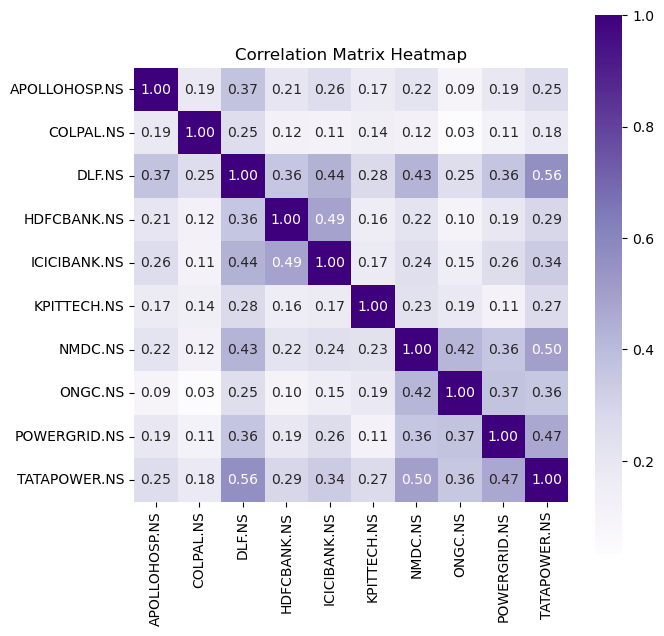

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming corr_matrix is your DataFrame containing the correlation matrix
plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Purples", cbar=True, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


**Rolling Correlation of a stock and Portfolio:**

Input:

In [45]:
# Compute rolling correlation with a window size, Stock and Portfolio
stock = 'KPITTECH.NS'
window_size = 30

Last 10 rolling correlation values: 
Date
2024-10-23 00:00:00+00:00   -0.242311
2024-10-24 00:00:00+00:00    0.221494
2024-10-25 00:00:00+00:00    0.468718
2024-10-28 00:00:00+00:00    0.580428
2024-10-29 00:00:00+00:00    0.637901
2024-10-30 00:00:00+00:00    0.680706
2024-10-31 00:00:00+00:00    0.709551
2024-11-01 00:00:00+00:00    0.728612
2024-11-04 00:00:00+00:00    0.754674
2024-11-05 00:00:00+00:00    0.774898
dtype: float64


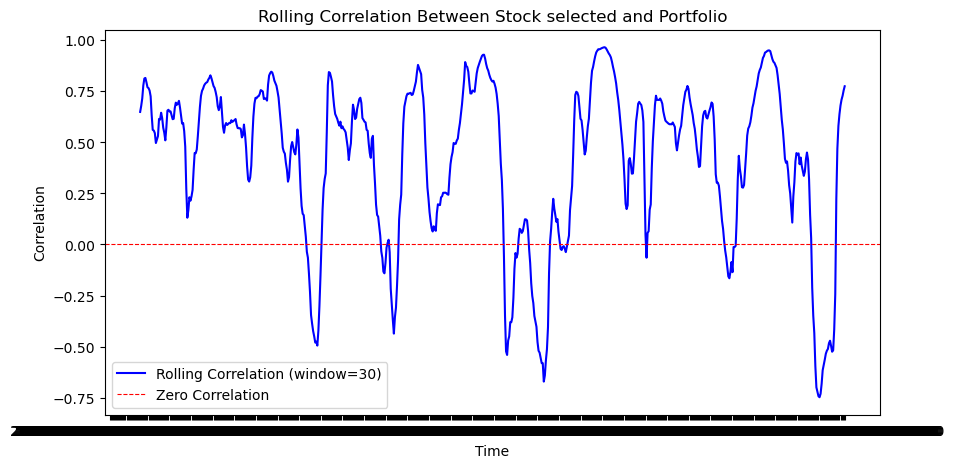

In [46]:
rolling_corr = pf[stock].rolling(window=window_size).corr(pf['Portfolio'])

print("Last 10 rolling correlation values: ")
print(rolling_corr.tail(10))

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(rolling_corr, label=f"Rolling Correlation (window={window_size})", color="blue")
plt.title("Rolling Correlation Between Stock selected and Portfolio")
plt.xlabel("Time")
plt.ylabel("Correlation")
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label="Zero Correlation")
plt.legend()
plt.show()

#### 3) Portfolio Variance
**DISPERSION of portfolio's return around it's expected return (mean)**

In [48]:
weights = np.array([0.12,0.08,0.1,0.15,0.05,0.04,0.1,0.12,0.12,0.12])

In [49]:
# Calculate the covariance matrix on daily returns
cov_matrix = (daily_returns.cov())*250 
'''
 Multiplying the daily covariance matrix by 250 annualizes it. 
This is because the covariance (and variance) of returns scales linearly with time when dealing with daily returns. 
So, multiplying by 250 gives you the annualized covariance matrix.

Giving insights into how the returns of different assets vary together on a yearly basis.
'''
cov_matrix

,APOLLOHOSP.NS,COLPAL.NS,DLF.NS,HDFCBANK.NS,ICICIBANK.NS,KPITTECH.NS,NMDC.NS,ONGC.NS,POWERGRID.NS,TATAPOWER.NS
APOLLOHOSP.NS,0.065317,0.009993,0.031434,0.011833,0.013116,0.017725,0.019918,0.007633,0.013124,0.021213
COLPAL.NS,0.009993,0.043932,0.017637,0.005448,0.004625,0.012141,0.009100,0.002269,0.006291,0.012220
DLF.NS,0.031434,0.017637,0.109596,0.026279,0.028955,0.037688,0.050893,0.027633,0.032001,0.060876
HDFCBANK.NS,0.011833,0.005448,0.026279,0.048680,0.021555,0.014718,0.017431,0.007540,0.011165,0.020619
ICICIBANK.NS,0.013116,0.004625,0.028955,0.021555,0.040404,0.014094,0.017642,0.010076,0.013751,0.022108
KPITTECH.NS,0.017725,0.012141,0.037688,0.014718,0.014094,0.168451,0.033340,0.025496,0.011946,0.036087
NMDC.NS,0.019918,0.009100,0.050893,0.017431,0.017642,0.033340,0.129210,0.050378,0.034274,0.058626
ONGC.NS,0.007633,0.002269,0.027633,0.007540,0.010076,0.025496,0.050378,0.111518,0.032910,0.038704
POWERGRID.NS,0.013124,0.006291,0.032001,0.011165,0.013751,0.011946,0.034274,0.032910,0.070600,0.040559
TATAPOWER.NS,0.021213,0.012220,0.060876,0.020619,0.022108,0.036087,0.058626,0.038704,0.040559,0.106464


In [50]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

In [51]:
port_variance

0.0298438990611309

In [52]:
print(f"{port_variance * 100:.2f} %squared")

2.98 %squared


#### 4) Portfolio Volatility (or Standard Deviation)
**DISPERSION in SAME UNIT as stock change**

In [54]:
# Calculate the standard deviation by taking the square root of variance
port_standard_dev = np.sqrt(port_variance)
port_standard_dev

0.17275386844042276

In [55]:
print(f"Standard deviation of portfolio is: "+str(round(port_standard_dev*100,2))+" %")

Standard deviation of portfolio is: 17.28 %


#### 5) Sharpe Ratio
**It is a risk-adjusted return that tells the efficiency of risk taking** <br/>
Sharpe ratio = (annualized return - risk free rate) / (annualized portfolio standard deviation) <br/>

**Annualized Return:**

In [58]:
# Calculate total rate of return from start to end
total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]
total_return

C:\Users\sujay\AppData\Local\Temp\ipykernel_17000\3803119708.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]


0.5864152330757295

In [59]:
# Annualize return
annualized_return = ((1 + total_return)**(12/months_diff))-1
annualized_return

0.17688862798106886

**Annualized Volatility:**

In [61]:
pf_returns = pf_AUM.pct_change()
pf_returns.tail()

Date
2024-10-30 00:00:00+00:00   -0.002378
2024-10-31 00:00:00+00:00    0.000704
2024-11-01 00:00:00+00:00    0.003742
2024-11-04 00:00:00+00:00   -0.016411
2024-11-05 00:00:00+00:00    0.004906
Name: Portfolio, dtype: float64

In [62]:
pf_vol = pf_returns.std()
pf_vol

0.010417888426513979

In [63]:
# Calculate annualized volatility from the standard deviation
pf_vol = pf_vol * np.sqrt(250)
pf_vol

0.16472127918645932

**Sharpe ratio:**

In [65]:
# Calculate the Sharpe ratio 
rfr = 0
sharpe_ratio = ((annualized_return - rfr) / pf_vol)
print("Sharpe Ratio: " + str(round(sharpe_ratio,3)))

Sharpe Ratio: 1.074


#### 6) Sortino Ratio
**A risk-adjusted return that focuses on downside risk (volatility) only** <br/>
sortino ratio = (annualized return - risk free rate) / (annualized portfolio downside standard deviation)

**Downside Deviations:**

In [68]:
# Calculate downside deviation
downside_returns = pf_returns[pf_returns < 0]  # Only negative deviations
downside_deviation = downside_returns.std()
downside_deviation

0.007342861315149271

In [69]:
# Calculate annualized volatility from the standard deviation for downside
downside_deviation = downside_deviation * np.sqrt(250)
downside_deviation

0.11610083149305572

**Sortino ratio:**

In [71]:
# Calculate Sortino Ratio
sortino_ratio = (annualized_return - rfr) / downside_deviation
print("Sortino Ratio: " + str(round(sortino_ratio,3)))

Sortino Ratio: 1.524


#### 7) Max Drawdown (252 period):

In [73]:
# Calculate the max value 
roll_max = pf_AUM.rolling(center = False, min_periods = 1, window = 252).max()

# center = False => For a window of size 252, the calculation includes the current data point and the 251 previous ones.

In [74]:
# Calculate the change from maximum value (drawdown):
daily_drawdown = (pf_AUM - roll_max) / roll_max

In [75]:
# Calculate the minimum (negative) daily draw-down | actually max daily drawdown
max_daily_drawdown = daily_drawdown.rolling(center=False,min_periods=1,window=252).min()

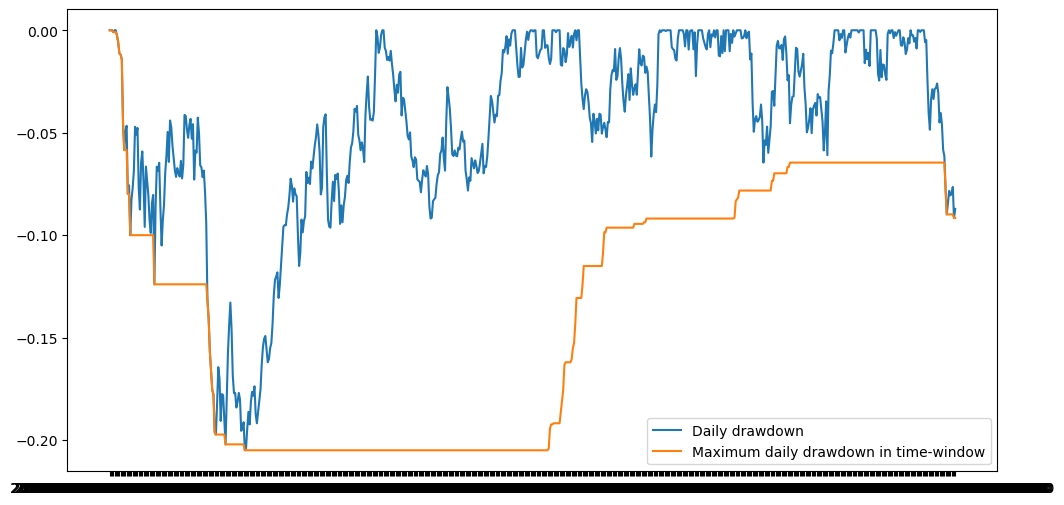

In [76]:
# Plot the results
plt.figure(figsize=(12,6))

plt.plot(pf_AUM.index, daily_drawdown, label='Daily drawdown')
plt.plot(pf_AUM.index, max_daily_drawdown, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

In [77]:
drawdown = pd.concat([roll_max, daily_drawdown, max_daily_drawdown], axis = 1)

# Optionally, rename the columns for clarity
drawdown.columns = ['Roll Max', 'Daily Draw Down', 'Max Daily Draw Down']
drawdown.tail()

,Roll Max,Daily Draw Down,Max Daily Draw Down
Date,,,
2024-10-30 00:00:00+00:00,1801.448004,-0.080547,-0.089828
2024-10-31 00:00:00+00:00,1801.448004,-0.079900,-0.089828
2024-11-01 00:00:00+00:00,1801.448004,-0.076457,-0.089828
2024-11-04 00:00:00+00:00,1801.448004,-0.091614,-0.091614
2024-11-05 00:00:00+00:00,1801.448004,-0.087158,-0.091614


In [78]:
# Save the DataFrame to an Excel file
output_file = 'drawdown_analysis.xlsx'
drawdown.to_excel(output_file)

print(f"DataFrame saved to {output_file}")

DataFrame saved to drawdown_analysis.xlsx


#### 8) Skew:
**ASSYMETRY of distribution around mean**

<Axes: >

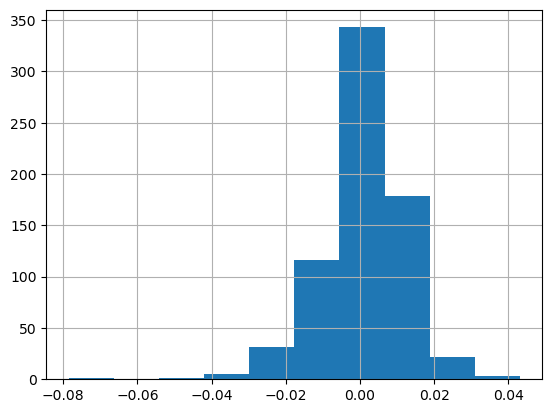

In [80]:
returns_port.hist()

In [81]:
returns_port.skew() # skew
print("Portfolio skew: " + str(round(returns_port.skew(),2)))

Portfolio skew: -0.94


If a return distribution shows a **positive skew** => investors can expect many small losses and few large returns from investment. <br/>
Conversely, a **negatively skewed** distribution => many small wins and a few large losses on the investment.<br/>
_Investors should seek positive skew so that few big positive bets can offset more small negative bets._

In [83]:
print(round(returns.skew(),2))

APOLLOHOSP.NS    0.08
COLPAL.NS        0.06
DLF.NS          -0.18
HDFCBANK.NS     -0.11
ICICIBANK.NS    -0.39
KPITTECH.NS      0.35
NMDC.NS         -0.40
ONGC.NS         -0.56
POWERGRID.NS    -0.58
TATAPOWER.NS    -0.22
Portfolio       -0.94
dtype: float64


#### 9) Kurtosis:
**"TAILEDNESS of distribution"**

In [85]:
returns_port.kurt()

print("Portfolio kurtosis: " + str(round(returns_port.kurt(),1)))

Portfolio kurtosis: 5.4


k = 3: normal<br/>
k>3: fat tail <br/>
k<3: thin tail

In [87]:
print(round(returns.kurt(),1))

APOLLOHOSP.NS     1.8
COLPAL.NS         2.4
DLF.NS            2.8
HDFCBANK.NS       6.9
ICICIBANK.NS      3.3
KPITTECH.NS       4.1
NMDC.NS           2.3
ONGC.NS          10.5
POWERGRID.NS      6.3
TATAPOWER.NS      4.7
Portfolio         5.4
dtype: float64


#### 10) Beta:
**SENSITIVITY and DIRECTION RELATIVE to MARKET**<br/>
Beta = Cov(pf, mkt) / Var(mkt)

In [89]:
benchmark = "^NSEI"

In [90]:
bm_data = yf.download(benchmark, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [91]:
bm = bm_data['Close']
bm.tail()

Ticker,^NSEI
Date,
2024-10-30 00:00:00+00:00,24340.849609
2024-10-31 00:00:00+00:00,24205.349609
2024-11-01 00:00:00+00:00,24304.349609
2024-11-04 00:00:00+00:00,23995.349609
2024-11-05 00:00:00+00:00,24213.300781


In [92]:
bm_returns = bm.pct_change()
bm_returns.dropna(inplace = True)

In [93]:
bm_returns_data = bm_returns.iloc[:,0]
bm_returns.head()

Ticker,^NSEI
Date,
2022-01-04 00:00:00+00:00,0.010187
2022-01-05 00:00:00+00:00,0.006740
2022-01-06 00:00:00+00:00,-0.010005
2022-01-07 00:00:00+00:00,0.003764
2022-01-10 00:00:00+00:00,0.010700


In [94]:
# Convert 'Date' column in both dataframes to datetime64 (make sure they're both in the same format)
returns.index = pd.to_datetime(returns.index, errors='coerce')  # Coerce invalid formats to NaT
bm_returns.index = pd.to_datetime(bm_returns.index, errors='coerce')  # Same here

# Now merge on 'Date' (after converting to datetime)
market_and_pf = pd.merge(returns, bm_returns, on='Date', how='inner')[['Portfolio',benchmark]]

In [95]:
market_and_pf.tail()

,Portfolio,^NSEI
Date,,
2024-10-30 00:00:00+00:00,-0.004503,-0.005150
2024-10-31 00:00:00+00:00,0.002425,-0.005567
2024-11-01 00:00:00+00:00,0.007162,0.004090
2024-11-04 00:00:00+00:00,-0.018188,-0.012714
2024-11-05 00:00:00+00:00,0.010250,0.009083


In [96]:
# Calculate the co-variance matrix between Portfolio and benchmark
covariance_matrix = market_and_pf[['Portfolio', benchmark]].cov()
covariance_matrix

,Portfolio,^NSEI
Portfolio,0.000117,0.000078
^NSEI,0.000078,0.000079


In [97]:
# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print(covariance_coefficient)

7.768508107421926e-05


In [98]:
benchmark_variance = market_and_pf[benchmark].var()
benchmark_variance

7.872100782149223e-05

In [99]:
# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient/benchmark_variance
print("Portfolio Beta is : " + str(round(portfolio_beta,2)))

Portfolio Beta is : 0.99


### Summary of some of the metrics:

In [101]:
print("Volatility / Standard deviation: "+ str(round(port_standard_dev*100,1))+ "%")
print("Sharpe Ratio: " + str(round(sharpe_ratio,2)))
print("Sortino Ratio: " + str(round(sortino_ratio,2)))
print("Skew: " + str(round(returns_port.skew(),2)))
print("Kurtosis: " + str(round(returns_port.kurt(),1)))
print("Beta: " + str(round(portfolio_beta,2)))

Volatility / Standard deviation: 17.3%
Sharpe Ratio: 1.07
Sortino Ratio: 1.52
Skew: -0.94
Kurtosis: 5.4
Beta: 0.99


## 5 Value at Risk (VaR) metrics

##### 1) Historical VaR

In [104]:
# Calculate Historical VaR:
#confidence level
var_level=95
var = np.percentile(returns['Portfolio'], 100-var_level)
var

-0.01802780764035417

or using a series:

In [106]:
var_level=95
var = np.percentile(returns_port, 100-var_level)
print("Historical VaR:", var)

Historical VaR: -0.01802780764035417


##### 2) Conditional VaR (CVaR) | Expected Shortfall (E.S.)

In [108]:
# Calculate Expected Shortfall:
cvar = returns[returns['Portfolio']<=var]['Portfolio'].mean()
cvar

-0.025710513893098662

or using a series: 

In [110]:
cvar = returns_port[returns_port<=var].mean()
print("Expected Shortfall:", cvar)

Expected Shortfall: -0.025710513893098662


##### Visualizing VaR

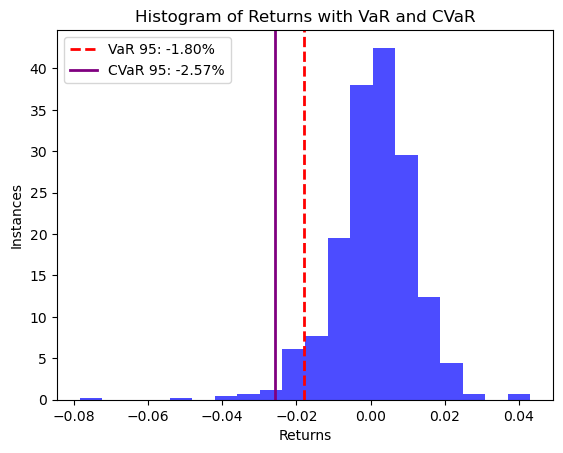

In [112]:
# Plotting the histogram
plt.hist(returns_port, bins=20, density=True, alpha=0.7, color='blue')
plt.title("Histogram of Returns with VaR and CVaR")
plt.xlabel("Returns")
plt.ylabel("Instances")

# Adding VaR and CVaR as vertical lines
plt.axvline(var, color='red', linestyle='--', linewidth=2, label=f"VaR 95: {var*100:.2f}%")
plt.axvline(cvar, color='purple', linestyle='-', linewidth=2, label=f"CVaR 95: {cvar*100:.2f}%")

# Adding a legend
plt.legend()

##### 3) Monte Carlo VaR

**Parameters and A Random Walk**

In [115]:
# Inputs or parameters:
T = 252
mu = np.mean(returns_port)
vol = np.std(returns_port)
S0 = pf_AUM.iloc[0]
# NO need to annualize, if your time step in the simulation represents days, weeks, or months and your inputs are at the corresponding frequency.

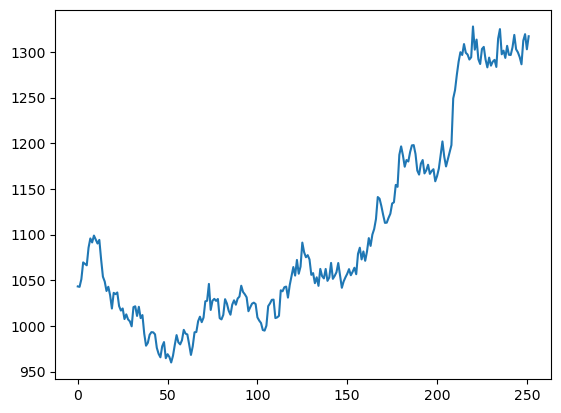

In [116]:
# Set the random seed
np.random.seed(42)

# Add one to the random returns
rand_rets = np.random.normal(mu,vol,T) + 1

# Forecasted random walk
forecasted_values = S0*(rand_rets.cumprod())

import matplotlib.pyplot as plt
# Plot the random walk
plt.plot(range(0, T), forecasted_values)
plt.show()

**Monte Carlo Simulations:**

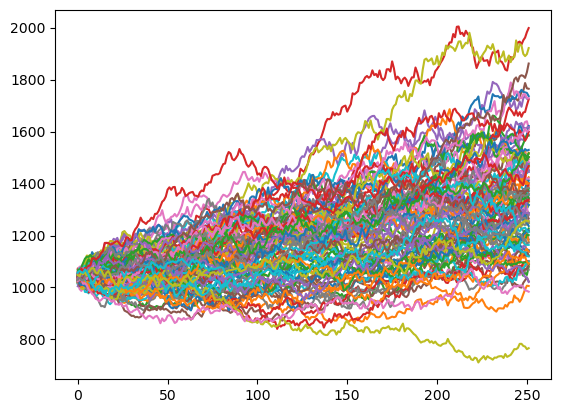

In [118]:
# Set the random seed
np.random.seed(42)

# Loop through 100 simulations
for i in range(100):

    # Generate the random returns
    rand_rets = np.random.normal(mu, vol, T) + 1
    
    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets).cumprod()
    
    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()

**Monte Carlo VaR:**

In [120]:
# Set the random seed
np.random.seed(42)

# Aggregate the returns
sim_returns = []

# Loop through 100 simulations
for i in range(100):

    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)
    
    # Save the results
    sim_returns.append(rand_rets)

# Calculate the VaR(99)
var_99 = np.percentile(sim_returns, 100-99)
print("Simulation or Monte Carlo VaR(99):", round(var_99*100, 2),"%")

Simulation or Monte Carlo VaR(99): -2.43 %


In [121]:
#sim_returns

**Visualizing Monte Carlo VaR(99):**

Simulation or Monte Carlo VaR(99): -2.43 %


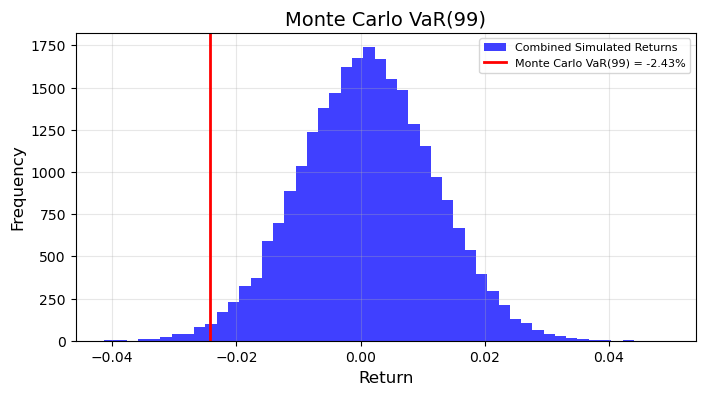

In [123]:
# Set the random seed
np.random.seed(42)

# Aggregate the returns
sim_returns = []

# Loop through 100 simulations
for i in range(100):
    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)
    # Save the results (flatten into the sim_returns list)
    sim_returns.extend(rand_rets)  # Ensure this is 1D

# Convert to a NumPy array for calculations
sim_returns = np.array(sim_returns)

# Calculate the VaR(99)
var_99 = np.percentile(sim_returns, 1)  # 1% represents 99% VaR
print("Simulation or Monte Carlo VaR(99):", round(var_99 * 100, 2), "%")

# Plot the histogram and VaR line
plt.figure(figsize=(8, 4))
plt.hist(sim_returns, bins=50, alpha=0.75, color='blue', label='Combined Simulated Returns')
plt.axvline(var_99, color='red', linestyle='-', linewidth=2, label=f'Monte Carlo VaR(99) = {round(var_99 * 100, 2)}%')

# Chart labels and title
plt.title('Monte Carlo VaR(99)', fontsize=14)
plt.xlabel('Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=8)
plt.grid(alpha=0.3)
plt.show()

##### 4) Stress VaR

In [125]:
# Stressed parameters: (assuming volatility to increase by 2%)
T = 252
mu = np.mean(returns_port)
vol = np.std(returns_port)+0.02
S0 = pf_AUM.iloc[0]
# NO need to annualize, if your time step in the simulation represents days, weeks, or months and your inputs are at the corresponding frequency.

In [126]:
vol

0.0308002385317995

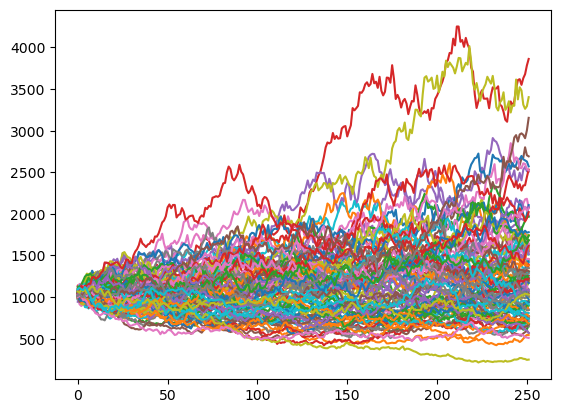

In [127]:
# Set the random seed
np.random.seed(42)

# Loop through 100 simulations
for i in range(100):

    # Generate the random returns
    rand_rets = np.random.normal(mu, vol, T) + 1
    
    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets).cumprod()
    
    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()

In [128]:
# Set the random seed
np.random.seed(42)

# Aggregate the returns
sim_returns = []

# Loop through 100 simulations
for i in range(100):

    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)
    
    # Save the results
    sim_returns.append(rand_rets)

# Calculate the VaR(99)
var_99 = np.percentile(sim_returns, 100-99)
print("Stressed VaR(99):", round(var_99*100, 2),"%")

Stressed VaR(99): -7.11 %


##### 5) Marginal VaR

In [130]:
# Adding new stock(s)
tickers = ["HDFCBANK.NS", "ONGC.NS", "ICICIBANK.NS", "APOLLOHOSP.NS", "COLPAL.NS", "POWERGRID.NS", "TATAPOWER.NS", "KPITTECH.NS", "DLF.NS", "NMDC.NS", "CIPLA.NS"]  # Add more tickers as needed

# Download historical data for 1 or 2 years
data = yf.download(tickers, start=start_date, end=end_date)

# Extract only the closing prices
closing_prices = data['Close']

[*********************100%***********************]  11 of 11 completed


In [131]:
df_new = closing_prices.copy()
df_new.head()

Ticker,APOLLOHOSP.NS,CIPLA.NS,COLPAL.NS,DLF.NS,HDFCBANK.NS,ICICIBANK.NS,KPITTECH.NS,NMDC.NS,ONGC.NS,POWERGRID.NS,TATAPOWER.NS
Date,,,,,,,,,,,
2022-01-03 00:00:00+00:00,4990.500000,930.500000,1463.800049,394.750000,1519.650024,764.700012,608.150024,103.997322,143.050003,153.750000,223.399994
2022-01-04 00:00:00+00:00,4964.600098,924.250000,1464.800049,394.450012,1528.550049,772.849976,608.150024,104.381645,147.800003,157.949997,226.300003
2022-01-05 00:00:00+00:00,4973.250000,928.549988,1466.150024,402.049988,1564.849976,788.049988,594.200012,106.533844,150.350006,156.487503,223.500000
2022-01-06 00:00:00+00:00,4964.450195,922.000000,1456.900024,398.950012,1539.750000,785.049988,630.450012,106.572273,150.800003,154.462494,228.449997
2022-01-07 00:00:00+00:00,5021.850098,914.750000,1469.900024,400.600006,1550.550049,793.250000,711.250000,106.572273,157.050003,153.899994,229.800003


In [132]:
# Count the total number of stocks
num_stocks = len(df_new.columns)
num_stocks

11

In [133]:
# Create an array of equal weights
equal_weights = np.repeat(1/num_stocks, num_stocks)
equal_weights

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

In [134]:
# Create portfolio returns column
df_new['Portfolio']= df_new.dot(equal_weights)

In [135]:
df_new.head()

Ticker,APOLLOHOSP.NS,CIPLA.NS,COLPAL.NS,DLF.NS,HDFCBANK.NS,ICICIBANK.NS,KPITTECH.NS,NMDC.NS,ONGC.NS,POWERGRID.NS,TATAPOWER.NS,Portfolio
Date,,,,,,,,,,,,
2022-01-03 00:00:00+00:00,4990.500000,930.500000,1463.800049,394.750000,1519.650024,764.700012,608.150024,103.997322,143.050003,153.750000,223.399994,1026.931584
2022-01-04 00:00:00+00:00,4964.600098,924.250000,1464.800049,394.450012,1528.550049,772.849976,608.150024,104.381645,147.800003,157.949997,226.300003,1026.734714
2022-01-05 00:00:00+00:00,4973.250000,928.549988,1466.150024,402.049988,1564.849976,788.049988,594.200012,106.533844,150.350006,156.487503,223.500000,1032.179212
2022-01-06 00:00:00+00:00,4964.450195,922.000000,1456.900024,398.950012,1539.750000,785.049988,630.450012,106.572273,150.800003,154.462494,228.449997,1030.712273
2022-01-07 00:00:00+00:00,5021.850098,914.750000,1469.900024,400.600006,1550.550049,793.250000,711.250000,106.572273,157.050003,153.899994,229.800003,1046.315677


In [136]:
returns_new = df_new.pct_change()
returns_new.dropna(inplace = True)

In [137]:
returns_new.head()

Ticker,APOLLOHOSP.NS,CIPLA.NS,COLPAL.NS,DLF.NS,HDFCBANK.NS,ICICIBANK.NS,KPITTECH.NS,NMDC.NS,ONGC.NS,POWERGRID.NS,TATAPOWER.NS,Portfolio
Date,,,,,,,,,,,,
2022-01-04 00:00:00+00:00,-0.005190,-0.006717,0.000683,-0.000760,0.005857,0.010658,0.000000,0.003696,0.033205,0.027317,0.012981,-0.000192
2022-01-05 00:00:00+00:00,0.001742,0.004652,0.000922,0.019267,0.023748,0.019667,-0.022938,0.020619,0.017253,-0.009259,-0.012373,0.005303
2022-01-06 00:00:00+00:00,-0.001769,-0.007054,-0.006309,-0.007710,-0.016040,-0.003807,0.061006,0.000361,0.002993,-0.012940,0.022148,-0.001421
2022-01-07 00:00:00+00:00,0.011562,-0.007863,0.008923,0.004136,0.007014,0.010445,0.128162,0.000000,0.041446,-0.003642,0.005909,0.015138
2022-01-10 00:00:00+00:00,0.008642,0.001585,-0.003198,0.018347,0.005546,0.022061,0.048225,0.009376,0.008278,-0.005848,0.008486,0.009666


In [138]:
# Calculate Historical VaR:
#confidence level
var_level=95
var_new = np.percentile(returns_new['Portfolio'], 100-var_level)
var_new

-0.015878087720728074

In [139]:
returns_port_new = returns_new['Portfolio']

In [140]:
var_level=95
var_new = np.percentile(returns_port_new, 100-var_level)
print("Historical VaR:", var_new)

Historical VaR: -0.015878087720728074


In [141]:
MVaR = var_new - var

In [142]:
print("MVaR: " + str(round(MVaR*100,2))+"%")

MVaR: 0.21%
